In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [62]:
# Veri Okuma : 

ds_salaries = pd.read_csv("ds_salaries.csv")
df = ds_salaries.copy()
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [63]:
df.info()

# Veri setinde genel bilgilerine bakma

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [66]:
df.shape

# Toplamda 607 satır 12 colona sahip

(607, 12)

In [72]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [67]:
df.describe().T

# Burada salary colonu'nun ortalamsı ile standart sapması arasında çok fazla fark olduğu için aykırı değerler için bir boxplot çizilip kontrol edeceğiz.

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [68]:
df.drop("Unnamed: 0" , axis = 1 , inplace= True),
df.head()

# Lazım olmayacağını düşündüğümüz için drop işlemini gerçekleştirdik.

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [69]:
df.duplicated().sum()

# Tekrar eden toplamda 42 değer varmış.

42

In [70]:
df.drop_duplicates(inplace=True)

# Silme işlemini gerçekleştirdik.

In [71]:
## Tekrardan bir shape'ine bakalım

df.shape

(565, 11)

## Veriyi Görselleştirme :

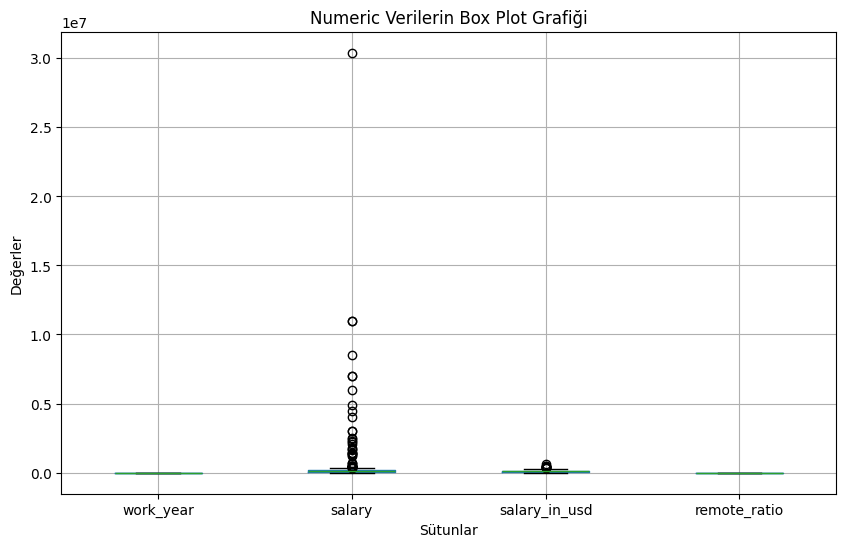

In [11]:
# Sadece sayısal verileri içeren sütunları seçiyoruz
numeric_columns = df.select_dtypes(include=['number'])

# Box plot çizdiriyoruz
plt.figure(figsize=(10, 6))
numeric_columns.boxplot()
plt.title('Numeric Verilerin Box Plot Grafiği')
plt.xlabel('Sütunlar')
plt.ylabel('Değerler')
plt.show()

## Salary değişkeninde çok fazla aykırı değerler bulunmaktadır. Bu yüzden salary colonunu düşüreceğiz.

In [77]:
df.drop("salary" , axis = 1 , inplace = True) 

# Salary colonunu drop ettik tekrardan bir desciribe kontrol edelim 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,565.0,2021.364602,0.698138,2020.0,2021.0,2021.0,2022.0,2022.0
salary_in_usd,565.0,110610.343363,72280.702792,2859.0,60757.0,100000.0,150000.0,600000.0
remote_ratio,565.0,69.911504,40.900666,0.0,50.0,100.0,100.0,100.0


C:\Users\kulme\AppData\Local\Temp\ipykernel_11316\2945014548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10 , palette = "Blues")


Text(0.5, 1.0, "Departman Bazında Maaş Ortalamalarının İlk 10'u ")

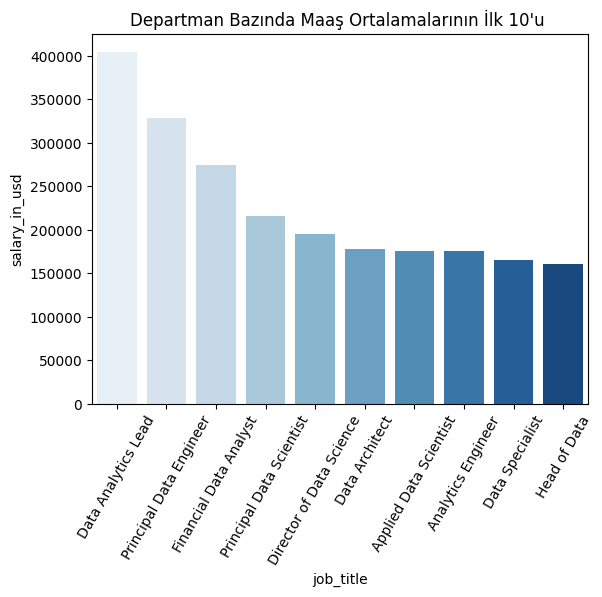

In [78]:
top_10 = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).head(10)
plt.xticks(rotation = 60)
sns.barplot(data = top_10 , palette = "Blues")
plt.title("Departman Bazında Maaş Ortalamalarının İlk 10'u ")

# Departmandaki ilk on ortalama maaşlar bu şekilde en fazla maaşı alan departman ise "Data Analytics Lead"

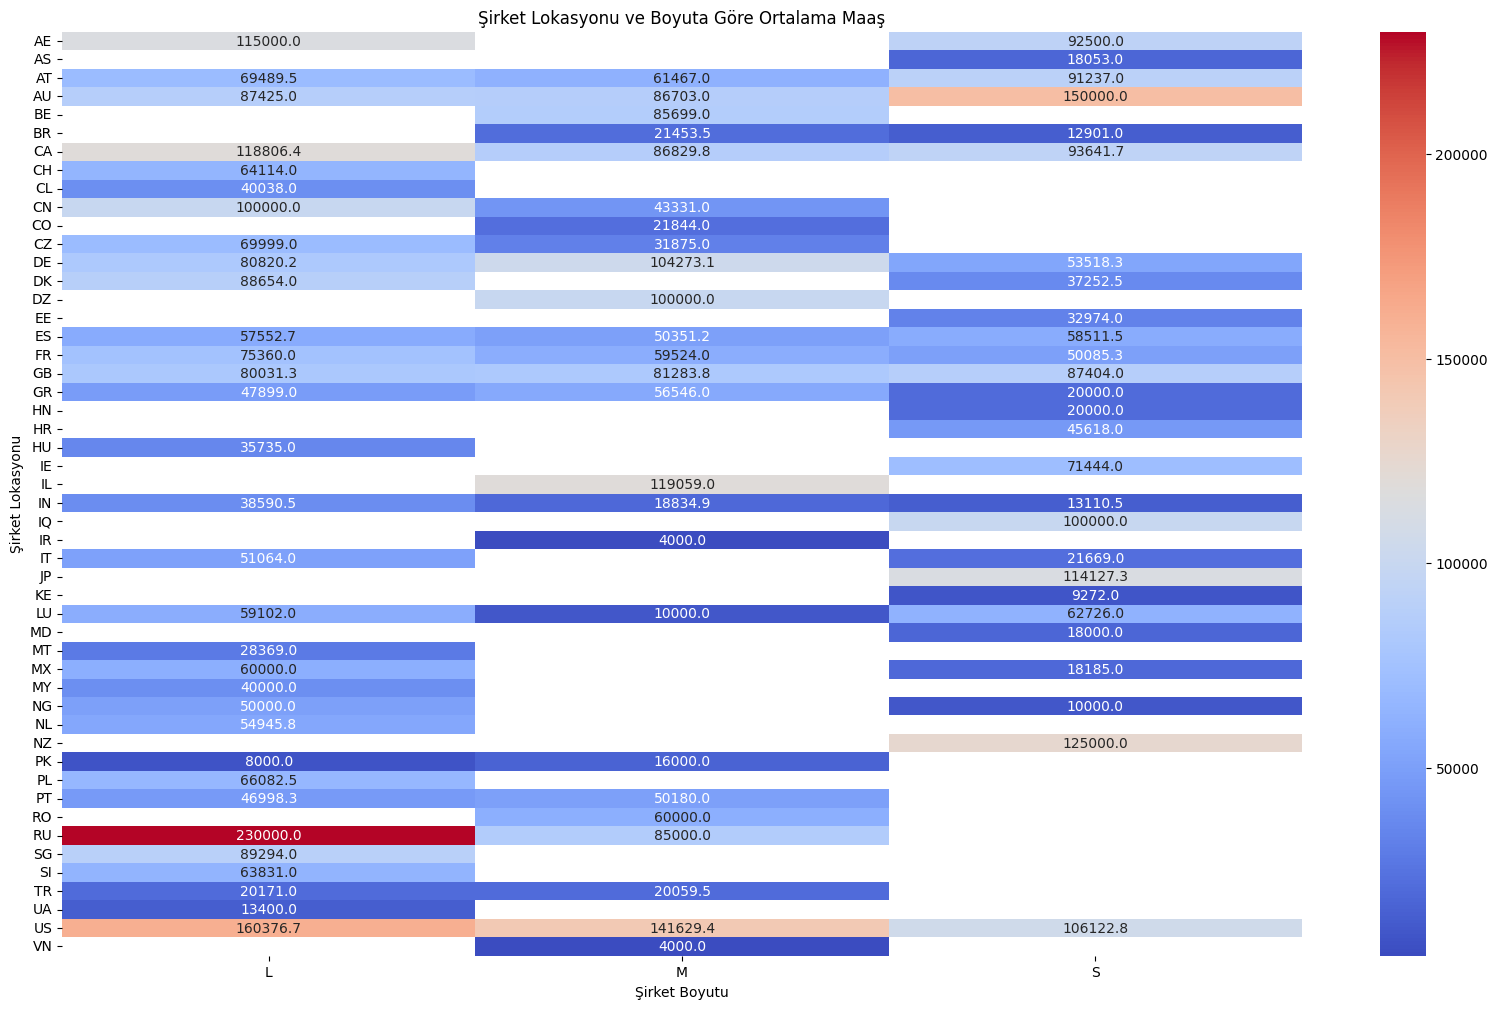

In [79]:
# Veriyi yeniden şekillendirme
company_salary = df.groupby(["company_location","company_size"])["salary_in_usd"].mean().unstack()

# Heatmap oluşturma
plt.figure(figsize=(20, 12))
sns.heatmap(company_salary, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Şirket Lokasyonu ve Boyuta Göre Ortalama Maaş')
plt.xlabel('Şirket Boyutu')
plt.ylabel('Şirket Lokasyonu')
plt.show()

# Ülkelerin şirket büyüklüğüne göre ortalama maaş bilgileri.

Text(0.5, 1.0, 'Yıllara Göre Deneyim Seviyesi Maaşları')

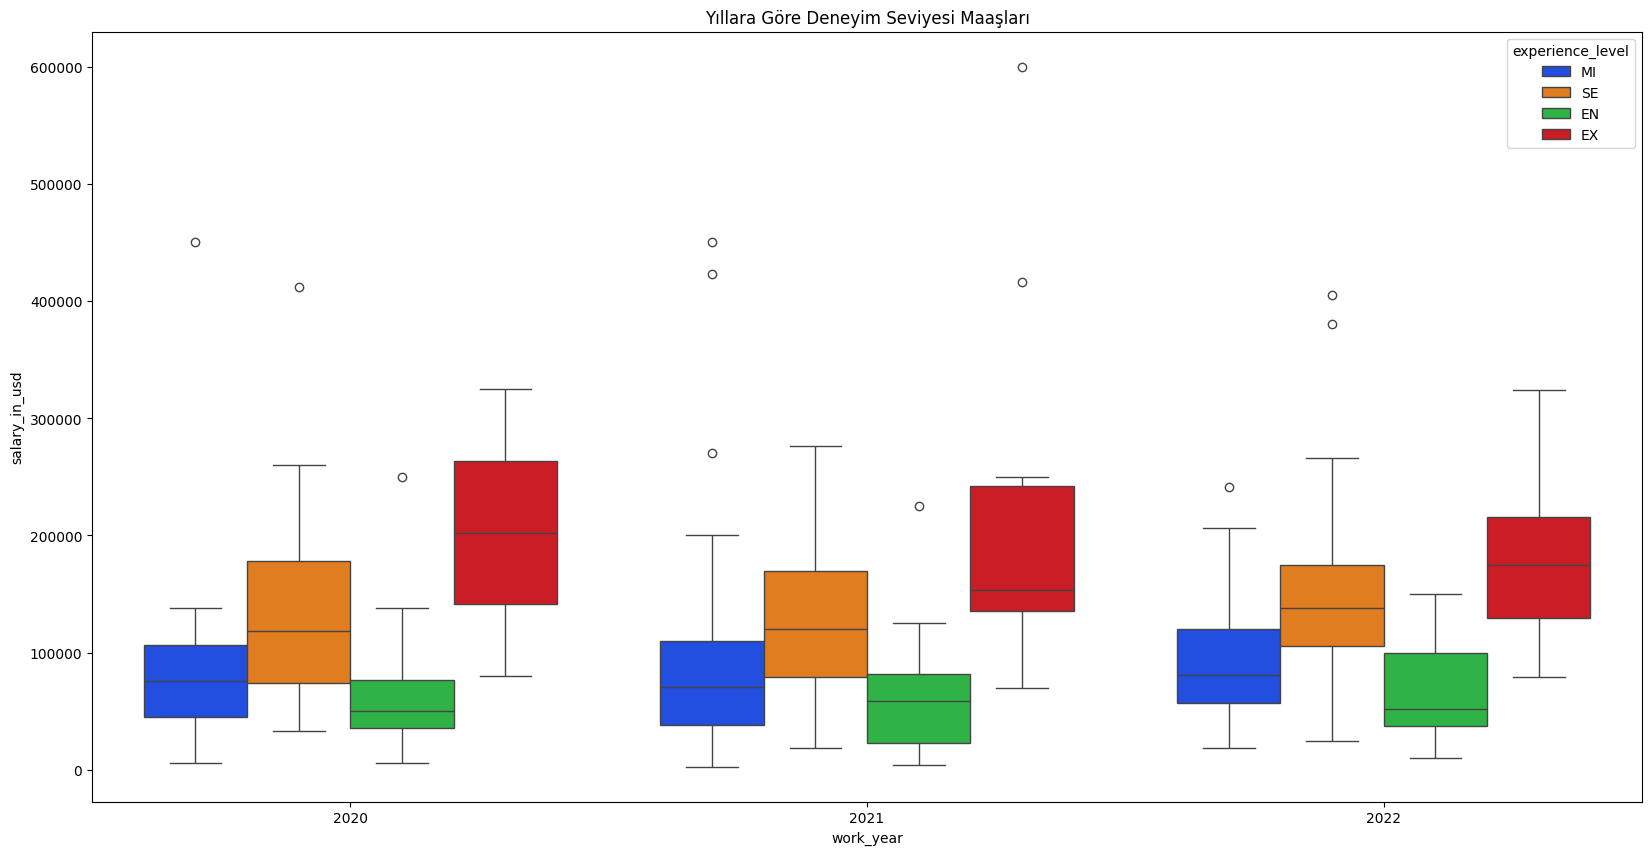

In [80]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df , x = "work_year" , y = "salary_in_usd" , hue = "experience_level" , palette = "bright")
plt.title("Yıllara Göre Deneyim Seviyesi Maaşları")

# Yıllara göre deneyim seviyelerine verilen maaşlar.

C:\Users\kulme\AppData\Local\Temp\ipykernel_11316\3877184131.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x = "salary_currency" , palette = "bright")


Text(0.5, 1.0, 'Tercih Edilen Para Birimi Grafiği')

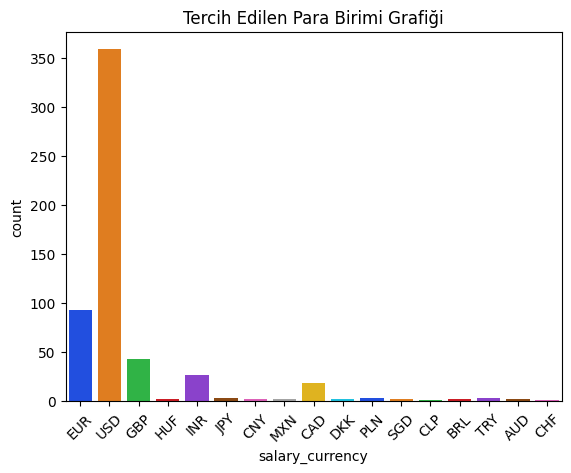

In [81]:
sns.countplot(data = df , x = "salary_currency" , palette = "bright")
plt.xticks(rotation = 45);
plt.title("Tercih Edilen Para Birimi Grafiği")

# En fazla tercih edilen para birimi "USD" olmakla birlikte onu takip eden para birimi "EUR" olmuştur.

C:\Users\kulme\AppData\Local\Temp\ipykernel_11316\3739292384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x = "company_location" , palette = "bright")


Text(0.5, 1.0, 'Ülkelerde Bulunan Şirket Sayısı')

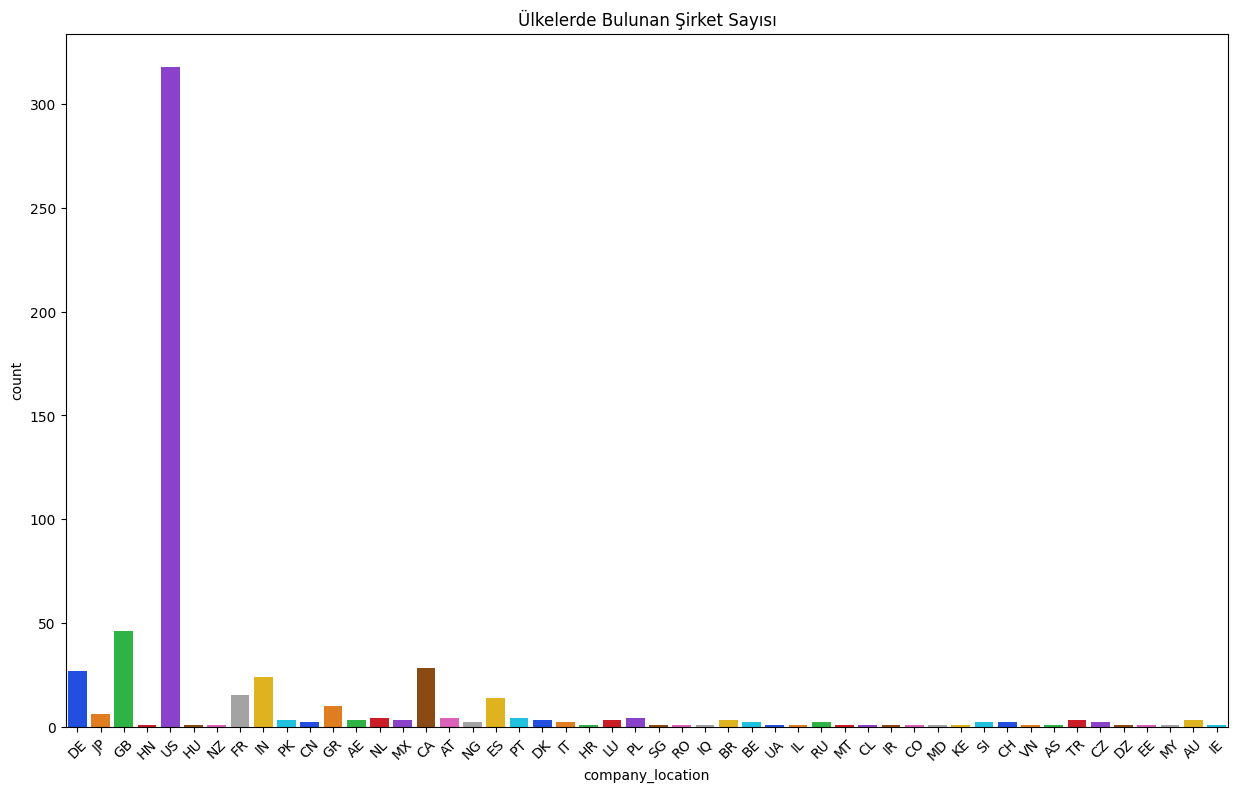

In [89]:
plt.figure(figsize=(15,9))
sns.countplot(data = df , x = "company_location" , palette = "bright")
plt.xticks(rotation = 45);
plt.title("Ülkelerde Bulunan Şirket Sayısı")

In [96]:
def count_plot(feature):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data=df,x=feature)
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))
    plt.xticks(rotation=90)
    plt.show()

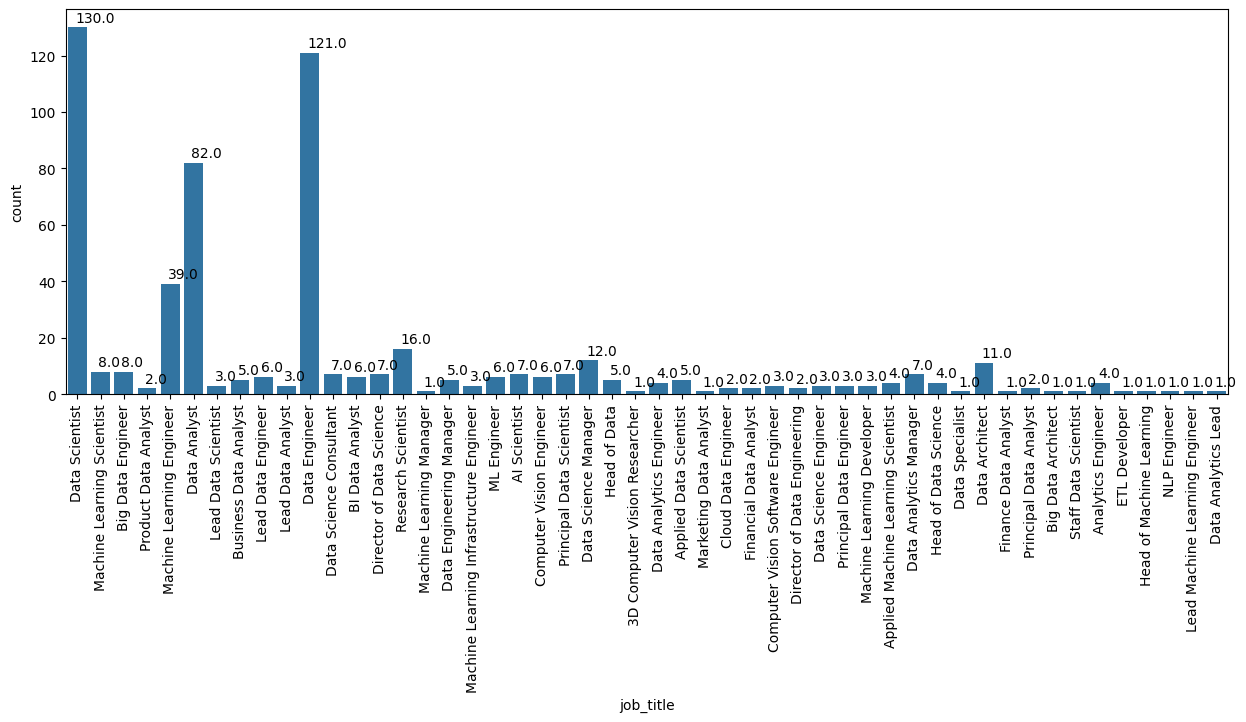

In [97]:
count_plot("job_title")

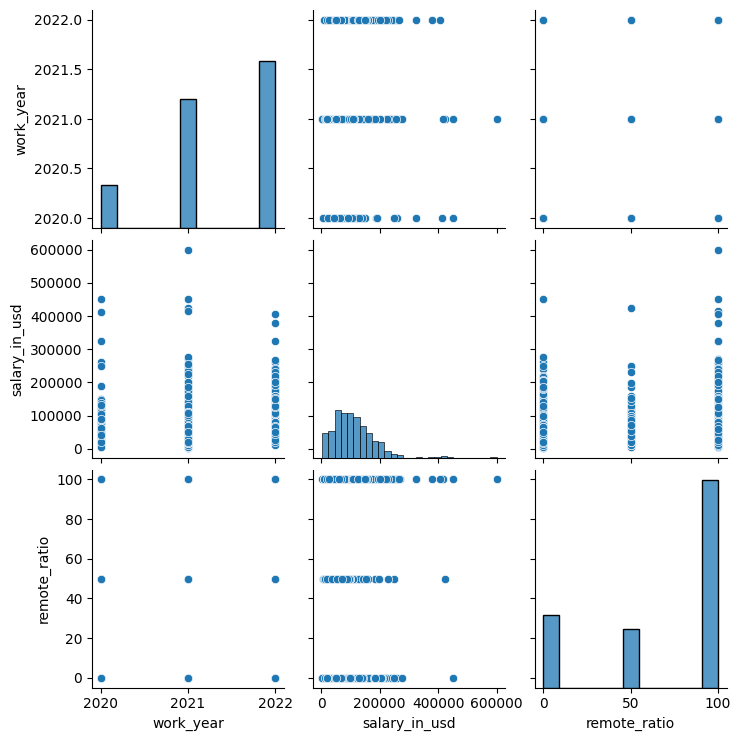

In [107]:
sns.pairplot(df)

In [91]:
# End